## 골프관련 AI업체에서도 골프도 할 줄 알면서 
## AI에도 지식이 있는 인재를 원한다.
## 야구도 동일하지 않을까


In [ ]:
# 자동차 연비 예측
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

dataset_path = keras.utils.get_file("auto-mpg.data" , "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ["MPG" , "Cylinders" , "Displacement" , "Horsepower" , "Weight"  , "Accleration" , "Model Year" , "Origin"]
raw_dataset = pd.read_csv(dataset_path , names = column_names , na_values = "?" , comment = "\t" , sep = " " , skipinitialspace = True)

# 누락된 항목확인
raw_dataset.isna().sum()

# 누락된 항목의 행 삭제
raw_dataset = raw_dataset.dropna()

# 누락된 항목 삭제 확인
raw_dataset.isna().sum()

# 가장 초기의 data에서 전체를 랜덤으로 섞고 data 모두 df변수에 저장하기
df = raw_dataset.sample(frac = 1)

# 랜덤으로 뒤섞어 놓은 value들을 dataset에 저장
dataset = df.values

# 1 번 부터 끝까지
x_data = dataset[: , 1:]
# 전체의 0번만
y_data = dataset[: , 0]

# train해줄 데이터 , test해줄 데이터 만들기 (test_size = 30%를 evaluate할때 사용해줄 test데이터로 제외시켜놓음)
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.3 , random_state = seed)

# 데이터 정규화
# 이 부분 작동이 어떻게 되는지 잘 모르겠으니 알아볼것
mean = x_train.mean(axis = 0)
x_train -= mean
std = x_train.std(axis = 0)
x_train /= std
x_test -= mean
x_test /= std

# 모델 만들기 
model = Sequential()
# 노드는 총 24 , 12 , 1 데이터는 선형데이터 , 활성화 함수는 relu , mse(평균제곱근공식) 
model.add(Dense(24 , input_dim = 7 , activation  =  "relu"))
model.add(Dense(12 , activation  =  "relu"))
model.add(Dense(1))
model.compile(loss = "mse" , optimizer = optimizers.RMSprop(lr  = 0.01) , metrics = ["mse"])

# callbacks함수 설정
# checkpoint함수에 요소이기 때문에 modelpath를 작성
modelpath = "./model/"
# checkpoint는 모델을 만들려고 하지않는다면 굳이 할 필요없을거 같지만 작성하는 방법을 알아야 하기때문에 일단 작성
checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
# earlystopping은 조금 중요한거 같음 더이상 monitor하는 내용이 향상되지 않는데 더 epoch를 더 해주면 시가낭비임
earlystopping = EarlyStopping(monitor = "val_loss" , patience = 100)
# model.fit을 해주어서 model을 만들어 놓는다.
history = model.fit(x_train , y_train , epochs = 200 , verbose = 1 , callbacks = [checkpoint , earlystopping])
# 그래프를 그려주기 위해 hist변수에 DataFrame으로 history에 있는 내용들을 저장해줌
# history에는 수많은 loss , val_loss , 바이어스들이 존재함
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
# predict함수로 예상값을 반환 
# predict함수는 fit을 해준 후에 실행하는 함수이므로 이미 predict함수내에는 현재 사용하는 공식인 y = wx + b 라는 공식에서
# w , b는 이미 다 나와있음 저기서 x_test값을 x에 할당시켜주면 전체의 예측값이 연산됨
y_prediction = model.predict(x_test).flatten()

# 10개만 뽑아서 예측치와 실제값 확인 
for i in range(10):
    prediction = y_prediction[i]
    label = y_data[i]
    print("실제 데이터 : {:3f} , 예측데이터 : {:.3f}".format(label , prediction))
# summary함수로 model의 내부확인
model.summary()

              count         mean         std     min      25%     50%  \
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   
USA           314.0     0.624204    0.485101     0.0     0.00     1.0   
Europe        314.0     0.178344    0.383413     0.0     0.00     0.0   
Japan         314.0     0.197452    0.398712     0.0     0.00     0.0   

                  75%     max  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0  
USA              1.00     1.0  
Europe       

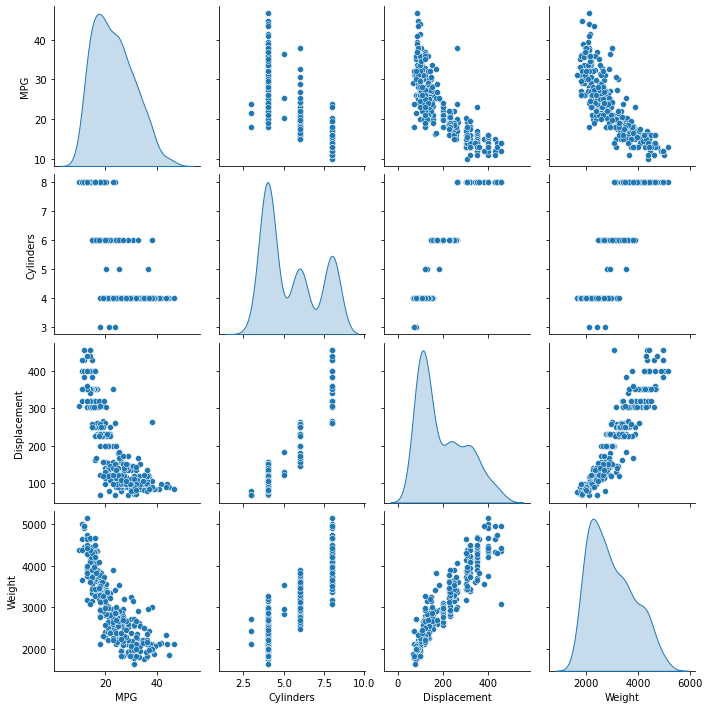

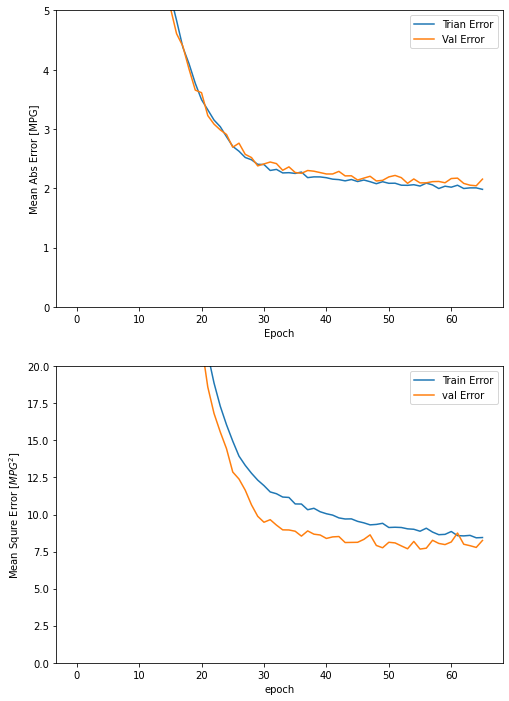

3/3 - 0s - loss: 6.7939 - mae: 1.9179 - mse: 6.7939
testset의 평균 절대 오차 :  1.92 MPG
실제 최소 = 8.923790 , 실제 최대 = 39.797070 , 오차 평균 = 1.917922
예상 최소 = 9.000000 , 예상 최대 = 44.300000


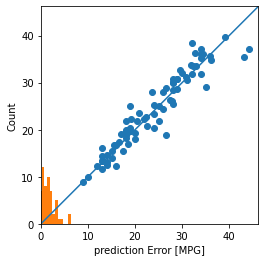

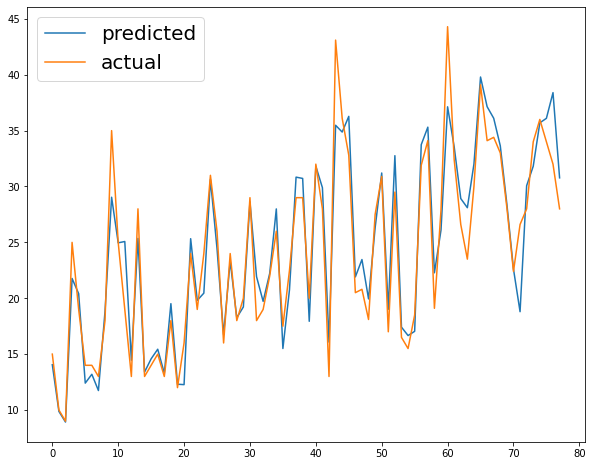

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

dataset_path = keras.utils.get_file("auto-mpg.data" , "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ["MPG" , "Cylinders" , "Displacement" , "Horsepower" , "Weight" , "Acceleration" , "Model Year" , "Origin"] 

raw_dataset = pd.read_csv(dataset_path , names = column_names , na_values = "?" , comment = "\t" , sep = " " , skipinitialspace = True)

# 누락된 데이터가 있는 행 추적
raw_dataset.isna().sum()

# 누락된 데이터가 있는 행을 고냥 싸잡아서 없애버림 
raw_dataset = raw_dataset.dropna()

# origin은 범주형 자료(몇개의 범주로 나누어진 자료)
# 수치형 자료(이산형자료와 연속형자료가 존재 , 이산형 = 이산적인 값을 갖는 데이터(일정기간 동안의 발생횟수 , 출산횟수 등등) , 연속형 자료 = 연속적인 값(신장 , 체중 , 혈압 등등)

# dataset의 origin을 pop을 해주어 column에서 삭제를 시켜주고 
# 새로운 변수 origin에 할당시켜줌
origin = raw_dataset.pop("Origin")

# 새로운 칼럼 3개를 만들어줌 
# 기존의 origin은 1, 2, 3으로 되어있는 범주형 자료였는데 수치형 자료로 변경시켜 
# 총 3개의 column으로 만들어서 기존 raw_dataset에 추가를 시켜줌
# 이 과정은 categorical을 하는과정을 나타내준거라고 생각하면 됨 
# 다차원 자료를 합쳐서 1차원으로 만들어준것임
# 각각의 자료를 우리가 원하는데로 구분할수 있게
raw_dataset["USA"] = (origin == 1) * 1.0
raw_dataset["Europe"] = (origin == 2) * 1.0
raw_dataset["Japan"] = (origin == 3) * 1.0

# 학습시킬 데이터와 검증할 데이터를 분류시켜줌
train_dataset = raw_dataset.sample(frac = 0.8 , random_state = 0)
# 내가 배운것과 차별점이라면 슬라이싱을 해주는 것이 아니라 drop를 이용해서 
# train_dataset에 입력되어 있는 data를 삭제하고 나머지를 test_dataset로 입력해주었음 
# 일단 기본적으로 train_set을 가져올때 sample로 가져와 주었고 
# raw_dataset - train_set를 해준 내용을 test_dataset에 할당을 시켜준것임
test_dataset = raw_dataset.drop(train_dataset.index)

# data확인 (훈련 세트에서 몇 개의 열을 선택해 산점도 행렬을 작성)
sns.pairplot(train_dataset[["MPG" , "Cylinders" , "Displacement" , "Weight"]], diag_kind = "kde")
# 행과 열로 다양한 설명을 출력시켜주는 describe메서드
train_stats = train_dataset.describe()
train_stats.pop("MPG")
# transpose는 행열을 바꾸어주는 메서드이다.
# (2 , 1) = (1 , 2) 이런식으로 차원을 변경시켜준다.
# train_stats를 transpose를 해주면 행과 열이 바뀌어 
# column이 행으로 가고 describe를 사용해 나온 데이터의 내용들이 열로 위치하게된다.
train_stats = train_stats.transpose()
print(train_stats)
# 특성과 레이블 분리하기
# 바꿔 말하자면 학습 후 검증 내용들을 제외시켜놓는 것이다.
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

# 모델을 정규화 시켜준다. 아직은 잘 모르지만 vlaue들의 갭 차이가 너무커서 
# 학습을 시킬때 정확성과 시간에서 불편하기 때문에
# 정규화를 해주어 학습하기 편하게끔 변경시켜준다.
def norm(x):
    return (x - train_stats["mean"]) / train_stats["std"]

# 정규화된 데이터
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print("normed" , normed_train_data)

# 우리가 model을 만드록 layer을 쌓는것을 함수로 만들어서 표현해준것이다.
# input_shape는 기존의 하던 input_dim = 2를인데 input_shape는 입력받는 데이터의 shape라고 생각하면 된다.
# 
def build_model():
    # 함수로 모델을 이렇게 만들어 준다.
    # 지금같이 간단한 데이터를 다룰때는 굳이 이럴필요는 없겠지만
    # 후에 큰 데이터를 다룰때는 이렇게 함수로 만들어서 사용하는것이
    # 현명한 방법일것 같다.
    model = Sequential()
    model.add(Dense(64 , input_shape = [len(train_dataset.keys())]))
    model.add(Dense(64 , activation = "relu"))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    # mse = 평균제곱오차 , mae = 평균 절대 오차 제곱을 하지않는다는 차이점이 있다.
    # 제곱을 하지 않음으로 값은 그렇게 크지 않겠지만 부호에 대해서 문제해결에 대한
    # 문제가 하나 생긴다.
    model.compile(loss = "mse" , optimizer = optimizer , metrics = ["mae" , "mse"])
    return model

# 함수 호출
model = build_model()

# 만들어진 모델을 확인 
model.summary()

# 모델을 실행해본다.
# 일단 간단하게 train데이터에서 10개의 샘플을 가져온다.
example_batch = normed_train_data[:10]
# predict함수를 이용해서 예측값 생성
# model이 학습이 되기전이기 때문에 정확도가 없다.
# 가중치 , 바이어스가 학습전이라 실행만 되면 충분하다.
example_result = model.predict(example_batch)
# 예측값 출력
example_result

# epoch가 끝날때마다 .을 출력해 훈련 진행 과정을 표시
class printDot(keras.callbacks.Callback):
    # on_epoch_end는 callbacks에서 지원해주는 함수이다.
    # 우리가 임의로 지정하는것이 아니다.
    def on_epoch_end(self , epoch , logs):
        if epoch % 100 == 0:
            print("")
        print("." , end = "")
EPOCHS = 1000
# modelpath = "./model/"
# checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
early = EarlyStopping(monitor = "val_loss" , patience = 10)

# model.fit에 입력값을 필히 정규화된 값으로 넣어줘야 함
history = model.fit(normed_train_data , train_labels , epochs = EPOCHS , validation_split = 0.2 , verbose = 0 , callbacks = [early , printDot()])

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch
    
    plt.figure(figsize = (8 , 12))
    plt.subplot(2,1,1)
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [MPG]")
    plt.plot(hist["epoch"] , hist["mae"] , label = "Trian Error")
    plt.plot(hist["epoch"] , hist["val_mae"] , label = "Val Error")
    
    plt.ylim([0,5]) # y축 범위설정
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel("epoch")
    # 텍스트 마크업 표현
    plt.ylabel("Mean Squre Error [$MPG^2$]")
    plt.plot(hist["epoch"] , hist["mse"] , label = "Train Error")
    plt.plot(hist["epoch"] , hist["val_mse"] , label = "val Error")
    
    plt.ylim([0 , 20]) # y축 범위설정
    plt.legend()
    plt.show()
    
plot_history(history)

loss , mae , mse = model.evaluate(normed_test_data , test_labels , verbose = 2)
print("testset의 평균 절대 오차 : {:5.2f} MPG".format(mae))

test_prediction = model.predict(normed_test_data).flatten()

plt.scatter(test_labels , test_prediction)
plt.xlabel("True Values [MPG]")
plt.xlabel("prediction [MPG]")
plt.axis("equal")
plt.axis("square")
plt.xlim([0 , plt.xlim()[1]])
plt.ylim([0 , plt.ylim()[1]])

_ = plt.plot([-100 , 100] , [-100 , 100])

error = test_prediction - test_labels
plt.hist(error , bins = 25)
plt.xlabel("prediction Error [MPG]")
_ = plt.ylabel("Count")

y_prediction = model.predict(normed_test_data).flatten()
plt.figure(figsize = (10, 8))
plt.plot(y_prediction , label = "predicted")
plt.plot(test_labels.values , label = "actual")
plt.legend(prop = {"size" : 20})

avr = abs(y_prediction - test_labels).mean()
print("실제 최소 = %f , 실제 최대 = %f , 오차 평균 = %f"%(min(y_prediction) , max(y_prediction), avr))
print("예상 최소 = %f , 예상 최대 = %f"%(min(test_labels) , max(test_labels)))

비지도 학습

회귀 연속된값을 분석하는 방법
분류 포유류 , 파충류 분류

분류는 다양한 항목으로 분류가 가능하다.
label 되어있지 않은 데이터로부터 패턴이나 형태를 찾아야 하기때문에 쉽지않음

비지도 학습은 내가 잘됬다 되지않았다 판단을 할 수가 없다.

클러스터링 = 비슷한 유형의 데이터를 그룹화함으로서 unlabel데이터에 숨겨진 
구조를 파악 

클러스터링을 응용하여 다음과 같은 것들을 구현할 수 있음

Recommendation Enginess (추천 엔진) : 개인화된 사용자 경험을 제공하기위해
상품들을 그룹화

Search Enginess(검색엔진) : 뉴스 토픽들과 검색 결과를 그룹화

쇼핑을 할때도 주로 사는것들을 분석을 해서 추천

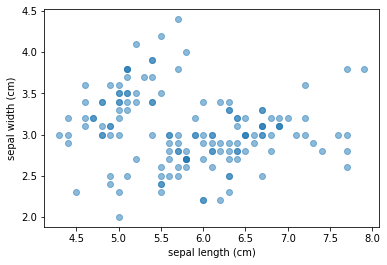

(150,)


In [50]:
# 비지도 학습 기본코드
# K-Means-clustering
# K 는 주어진 데이터로부터 그룹화 할 그룹 , 즉 클러스터의 수를 의미

# sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
# print(samples)

# sepal length와 width 두 가지 feature만을 사용하도록 하겠음
# 데이터로부터 두 feature만을 뽑아내어 산점도를 그려 봄(x축 -length , y축 - width)
from matplotlib import pyplot as plt
x = samples[: , 0]
y = samples[: , 1]
plt.scatter(x , y , alpha = 0.5) # alpha - 색상의 투명도 지정(0 = 완전 투명 , 1 = 불투명)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

# iris dataset은 원래 label이 제공되지만 , label이 없다고 가정하고 k-mean 알고리즘으로 
# 위 데이터를 그룹화 함 , k-means 클러스터링 알고리즘 사용 
f
# step1 : place k random centroids : 제일 먼저 k 개의 centroids(중심값)을 임의로 지정
# 3가지 종이 존재하므로 k = 3 으로 설정
import numpy as np
k = 3 

# 랜덤으로 x , y 좌표 3개 생성
# np.random.uniform은 주어진 최소 , 최대값 사이에서 k 개 만큼 실수 난수를 생성
centroids_x = np.random.uniform(min(x) , max(x) , k)
centroids_y = np.random.uniform(min(y) , max(y) , k)
centroids = list(zip(centroids_x , centroids_y))

# centroids 는 임의로 생성한 (x , y) 좌표 3개를 갖게 됨
plt.scatter(x , y , alpha = 0.5)
plt.scatter(centroids_x , centroids_y)
plt.show()

# step 2 : assign datas to nearest centroid
# centroids에 가까운 데이터들을 할당 , "가깝다" 라는 것을 정량적으로 계산하기 위해
# 각 데이터를 벡터로 간주하여 유클리드 거리를 계산
# 두 데이터 포인트 사이의 거리를 계산하는 distance()함수를 작성
def distance(a , b):
    return sum([(el_a - el_b) ** 2 for el_a , el_b in list(zip(a , b))]) ** 0.5 

# 각 데이터들 별로 3개의 centroids와의 거리를 측정. labels란 배열을 생성하고 , 
# 가장 가까운 centroids의 index를 저장
# 각 데이터 포인트를 그룹화 할 labels를 생성함(0 , 1 , 2)
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x , y)))

# 각 데이터를 순회하면서 centroids와의 거리를 측정합니다.
for i in range(len(samples)):
    distances = np.zeros(k) # 초기 거리는 모두 0으로 초기화 , 3개 요소 1차원 배열(k = 3)
    for j in range(k): # 3번 반복(각각의 x , y에 대해 3 중심과의 거리를 구해 distance[0][1][2]에 집어 넣음)
        distances[j] = distance(sepal_length_width[i] , centroids[j])
    cluster = np.argmin(distances) # np.argmin은 가장 작은값의 index를 반환(3 중심중 어디에 가까운지)
    labels[i] = cluster # label에는 각각 x , y에 대해 세 중심중 어디에 속하는지에 대한 정보가 있음

# 생성된 labels에는 0, 1, 2가 저정되어 각 데이터(iris data)가 어느 centroids그룹에
# 속해 있는지를 나타냄. 시각화를 통해 확인
plt.scatter(x , y , c = labels , alpha = 0.5)
plt.scatter(centroids_x , centroids_y , c = "red")
plt.show()

# 데이터들이 가까운 centroids에 잘 할당되어 있지만 , 처음 centroidsfmf 선책할때 랜덤으로 
# 선택했으므로 최적화가 필요

# step3 : update centroids - centroids를 새롭게 지정함으로서 데이터를 더 잘 그룹화 할 수 
# 있도록 만들어야 함 , 기존에 지정한 centroids를 복사해두어 centroids_old에 저장
from copy import deepcopy
centroids_old = deepcopy(centroids)

# 각 그룹별로 데이터의 평균을 계산 , 즉 , 각 데이터들의 평균 x좌표와 평균 y좌표를 계산하여
# 하나의 좌표를 계산,  이렇게 계산된 좌표는 새로운 centroids로 지정
for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장. labels에 섞인 값을 sepal_length_width에
    # 구분하여 저장 , points는 각각 그룹의 x , y좌표를 가진 list
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    # points의 각 feature , 즉 각 좌표의 평균 지점을 centroids로 지정
    centroids[i] = np.mean(points , axis = 0)
    
# data 및 type확인   
print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))
# 기존 centroids_old 와 centroids 위치 비교
plt.scatter(x , y , c = labels , alpha = 0.5)
plt.scatter(centroids[: , 0] , centroids[: , 1] , c = "red")
plt.scatter(centroids_old[: , 0] , centroids[: , 1] ,c = "blue")
plt.show()
# centroids가 전체적으로 중앙으로 이동하여 데이터의 중심지점에 위치한 것을 확인 할수 있음


# step 4 : repeat step 2 ~ 3 util convergence(집중점 , 집합점)
# 필요한 모든 building blocks를 구현 , 2 ~ 3단계를 반복하여 최적의 centroids를 찾는 
# 것이 목표 , 그런데 언제까지 찾아야 할까?
# error이라는 배열 생성 , error의 각 index는 centroids_old와 새롭게 지정된 centroids의
# 거리를 저장 , 이 거리가 모두 0 이 되면 최적해의 수렴(convergence)한 것으로 판단하여
# 반복을 종료
centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
    error[i] = distance(centroids_old[i] , centroids[i])
    
# 열의 데이터 중 조건과 맞는 데이터가 있으면 True 전혀 없으면 false
while(error.all() != 0):
    # step 2 : 가까운 centroids에 데이터를 할당합니다.
    for i in range(len(samples)):
        distances = np.zeros(k) # 초기 거리는 모두 0으로 초기화
        for j in range(k):
            distances[j] = distance(sepal_length_width[i] , centroids[j])
        cluster = np.argmin(distances) # np.argmin은 가장 작은 값의 index를 반환
        labels[i] = cluster
    # step 3 : centroids를 업데이트
    centroids_old = deepcopy(centroids)
    for i in range(k):
        # 각 그룹에 속한 데이터들만 골라 points에 저장합니다.
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    # 새롭게 centroids를 업데이트 했으니 error을 다시 계산합니다.
        centroids[i] = np.mean(points , axis = 0)
    for i in range(k):
        error[i] = distance(centroids_old[i] , centroids[i])
        
# 최적의 centroids를 찾았으니 이를 시각화 하여 확인
# 직관적으로 알아보기 위해 색을 r, g , b 로 설정 , centroids는 다이아몬드 형태로 마킹
colors = ["r" , "g" , "b"]
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[: , 0] , points[: , 1] , c = colors[i] , alpha = 0.5)
    
plt.scatter(centroids[: , 0] , centroids[: , 1] , marker = "D" , s = 150)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()